In [1]:
cameraBasler.camera.Close()

In [2]:
cameraBasler.camera.Open()
cameraBasler.camera.TriggerMode = "On"

In [3]:
import numpy as np 
from pypylon import pylon
import matplotlib.pyplot as plt
import time
import pulsestreamer as ps

In [6]:
cameraBasler.camera.IsGrabbing()
cameraBasler.camera.StopGrabbing()
pulsestreamer.pulser_off()
mw_source_smb100B.off()
mw_source_srssg.off()

0

In [37]:
cameraBasler.camera.IsGrabbing()

False

In [5]:
# Setting up MW, smb is lower freq
mw_source_smb100B.set_frequency(2.8253*1e9)
mw_source_smb100B.set_power(-15)
mw_source_smb100B.cw_on()

0

In [7]:
mw_source_srssg.set_frequency(2825300000)
mw_source_srssg.set_power(-12)
mw_source_srssg.cw_on()

0

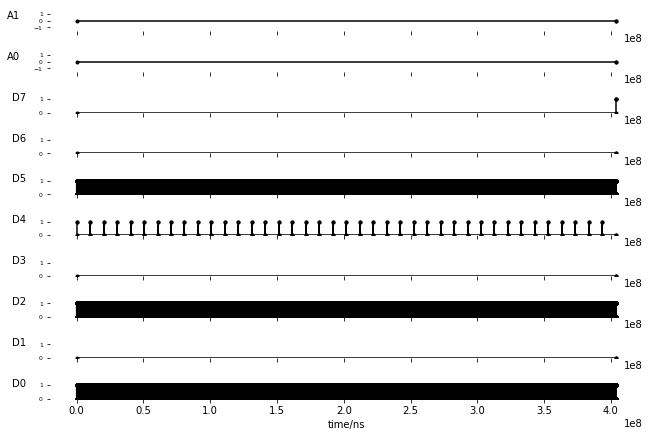

In [7]:
pulsestreamer._seq.plot()

In [21]:
pulsestreamer.pulser_on(False,1,False,final=ps.OutputState([pulsestreamer._laser_channel], 0, 0))

0

In [40]:
cameraBasler.camera.StopGrabbing()

In [12]:
i=0

tic = time.perf_counter()

while i < 100:

    cameraBasler.camera.StartGrabbingMax(_num_img)
    ind = 0

    pulsestreamer.pulser_on(False,1,False,None)

    while cameraBasler.camera.IsGrabbing():

        try:
            output = cameraBasler.camera.RetrieveResult(11, pylon.TimeoutHandling_ThrowException) # ms,exposure time < retrieval timeout
            if output.GrabSucceeded():
                imgs[:,:,ind] += output.Array
                ind += 1
                time.sleep(0.01)
                prev_array = output.Array
        except:
            print('failed')
            imgs[:,:,ind] += prev_array
            ind += 1
            time.sleep(0.01)
            cameraBasler.camera.StopGrabbing()
    
    print(i)
    i += 1

toc = time.perf_counter()
    
pulsestreamer.pulser_off()
mw_source_smb100B.off()

time.sleep(1) 
plt.plot(imgs[75,75,:])
plt.show()

print(f"Finished sweeps in {toc - tic:0.4f} seconds")

Traceback (most recent call last):
  File "C:\Users\cduPC\Documents\GitHub\qudi\logic\jupyterkernel\qzmqkernel.py", line 679, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-d094321a1aa8>", line 7, in <module>
    cameraBasler.camera.StartGrabbingMax(_num_img)
NameError: name '_num_img' is not defined


In [34]:
cameraBasler.camera.StopGrabbing()

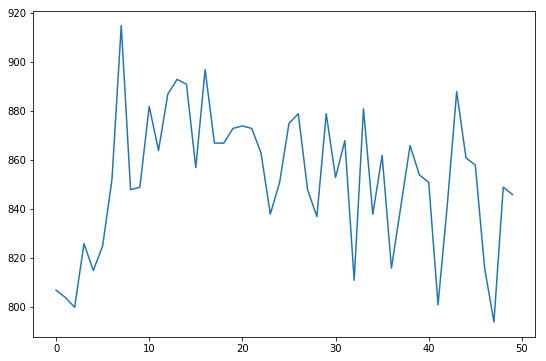

In [148]:
data_rabi = imgs
data_rabi.shape

plt.plot(data_rabi[75,75,:])
plt.show()

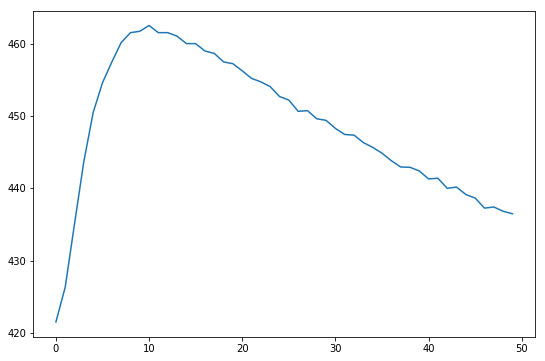

In [147]:
rabi_subtracted = data_rabi

for i in range(data_rabi.shape[0]):
    for j in range(data_rabi.shape[1]):
        rabi_subtracted[i,j,:] = data_rabi[i,j,:]/2000-imgs[i,j,:]/1100
        
plt.plot(rabi_subtracted[74,72,:])
plt.show()

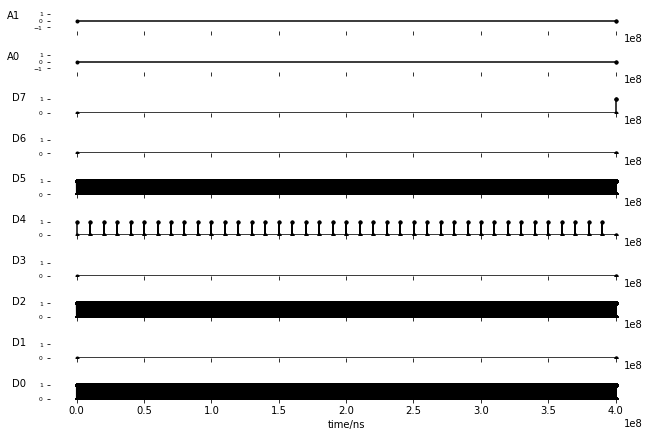

In [9]:
pulsestreamer._seq.plot()

In [21]:
pulsestreamer.pulser_off()

0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


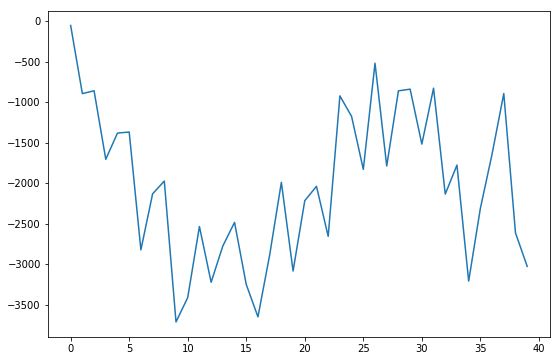

In [9]:
# measuring together
# background first

num_avg = 200# 100 sweeps is 290s ~ 5mins since both are occuring

tic = time.perf_counter()

if cameraBasler.camera.IsGrabbing():
    cameraBasler.camera.StopGrabbing()

cameraBasler.camera.Close()
cameraBasler.camera.Open()
cameraBasler.camera.TriggerMode = "On"

cameraBasler.camera.ExposureTime = 10000 # us, def 60000 us = 60ms

width = cameraBasler.get_constraints()[0]
height = cameraBasler.get_constraints()[1]

# _num_img = pulsedmeasurement._pm.method_param_widgets.get('rabiWFmw2')['num_of_points'].value() # number of points width = cameraBasler.get_constraints()[0]
_num_img = 40
height = cameraBasler.get_constraints()[1]

imgs = np.zeros((height,width,_num_img),dtype='float64')

cameraBasler.camera.StartGrabbingMax(_num_img)
ind = 0

time.sleep(0.5)

pulsestreamer.pulser_on(False,1,False,final=ps.OutputState([pulsestreamer._laser_channel], 0, 0))

while cameraBasler.camera.IsGrabbing():
    
    output = cameraBasler.camera.RetrieveResult(21, pylon.TimeoutHandling_ThrowException) # ms,exposure time < retrieval timeout
    if output.GrabSucceeded():
        imgs[:,:,ind] += output.Array
        ind += 1
#         print(ind)
        time.sleep(0.01)
            
            
pulsestreamer.pulser_off()


i=0

# tic = time.perf_counter()

while i < num_avg:

    cameraBasler.camera.StartGrabbingMax(_num_img)
    ind = 0

    pulsestreamer.pulser_on(False,1,False,None)

    while cameraBasler.camera.IsGrabbing():

        try:
            output = cameraBasler.camera.RetrieveResult(11, pylon.TimeoutHandling_ThrowException) # ms,exposure time < retrieval timeout
            if output.GrabSucceeded():
                imgs[:,:,ind] += output.Array
                ind += 1
                time.sleep(0.01)
                prev_array = output.Array
        except:
            print('failed')
            imgs[:,:,ind] += prev_array
            ind += 1
            time.sleep(0.01)
            cameraBasler.camera.StopGrabbing()
    
    print(i)
    i += 1

# toc = time.perf_counter()
pulsestreamer.pulser_off()

time.sleep(1)

# store background data
rabi_bg = imgs

# # Setting up MW
mw_source_smb100B.set_frequency(2.9260*1e9)
mw_source_smb100B.set_power(-12)
mw_source_smb100B.cw_on()

# mw_source_srssg.set_frequency(2.8258*1e9)
# mw_source_srssg.set_power(-26)
# mw_source_srssg.cw_on()

#measure signal
if cameraBasler.camera.IsGrabbing():
    cameraBasler.camera.StopGrabbing()

cameraBasler.camera.Close()
cameraBasler.camera.Open()
cameraBasler.camera.TriggerMode = "On"

cameraBasler.camera.ExposureTime = 10000 # us, def 60000 us = 60ms

# _num_img = pulsedmeasurement._pm.method_param_widgets.get('rabiWF')['num_of_points'].value() # number of points width = cameraBasler.get_constraints()[0]

imgs = np.zeros((height,width,_num_img),dtype='float64')

cameraBasler.camera.StartGrabbingMax(_num_img)
ind = 0

time.sleep(0.5)

pulsestreamer.pulser_on(False,1,False,final=ps.OutputState([pulsestreamer._laser_channel], 0, 0))

while cameraBasler.camera.IsGrabbing():
    
    output = cameraBasler.camera.RetrieveResult(11, pylon.TimeoutHandling_ThrowException) # ms,exposure time < retrieval timeout
    if output.GrabSucceeded():
        imgs[:,:,ind] += output.Array
        ind += 1
#         print(ind)
        time.sleep(0.01)
            
pulsestreamer.pulser_off()


i=0

while i < num_avg:

    cameraBasler.camera.StartGrabbingMax(_num_img)
    ind = 0

    pulsestreamer.pulser_on(False,1,False,None)

    while cameraBasler.camera.IsGrabbing():

        try:
            output = cameraBasler.camera.RetrieveResult(11, pylon.TimeoutHandling_ThrowException) # ms,exposure time < retrieval timeout
            if output.GrabSucceeded():
                imgs[:,:,ind] += output.Array
                ind += 1
                time.sleep(0.01)
                prev_array = output.Array
        except:
            print('failed')
            imgs[:,:,ind] += prev_array
            ind += 1
            time.sleep(0.01)
            cameraBasler.camera.StopGrabbing()
    
    print(i)
    i += 1

toc = time.perf_counter()
    
pulsestreamer.pulser_off()
mw_source_smb100B.off()
mw_source_srssg.off()

time.sleep(1) 

print(f"Finished data sweeps in {toc - tic:0.4f} seconds")

data_rabi = imgs


#subtract background

rabi_subtracted = data_rabi #initialize

for i in range(data_rabi.shape[0]):
    for j in range(data_rabi.shape[1]):
        rabi_subtracted[i,j,:] = data_rabi[i,j,:]-rabi_bg[i,j,:]
        
plt.plot(rabi_subtracted[70,70,:])
plt.show()


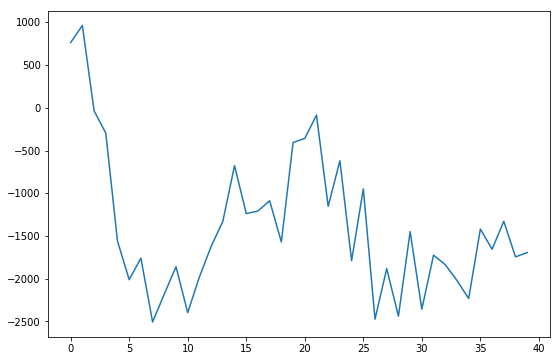

In [20]:
plt.plot(rabi_subtracted[70,70,:])
plt.show()

In [13]:
import numpy as np
import scipy.io

savedict = {'data' : rabi_subtracted}

scipy.io.savemat('rabi_Joan_500_2p9191_8db.mat',savedict)

# arr = np.asarray(rabi_2000reps)
# np.savetxt('rabidata_2000r.csv',arr, delimiter = ',')

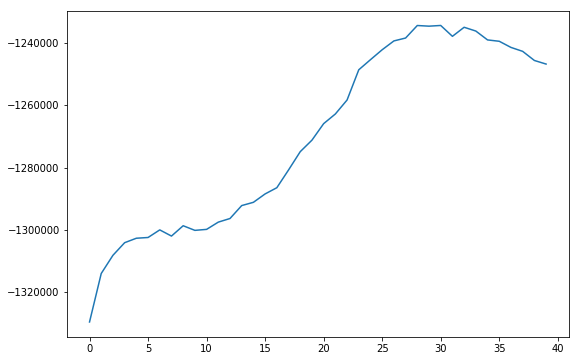

In [28]:
rabi_subtracted = data_rabi #initialize

for i in range(data_rabi.shape[0]):
    for j in range(data_rabi.shape[1]):
        rabi_subtracted[i,j,:] = data_rabi[i,j,:]-rabi_bg[i,j,:]
        
plt.plot(rabi_subtracted[74,75,:])
plt.show()


In [39]:
from matplotlib import pyplot as plt

plt.plot(rabi_subtracted[74,75,:])
plt.show()

In [40]:
rabi_subtracted[5,5,:]

array([ 1094.,   818.,  -310.,   511.,  -396.,  -921.,   731.,    -6.,
         471.,   412.,  -112.,    32.,   775.,   544.,   125.,   439.,
         155.,   973.,  -359.,   192.,   150.,    23.,   566.,   110.,
         626.,   434.,   165.,   555.,   229.,   538.,  1164.,  -273.,
        -553.,   405.,   132.,   598.,  -605., -1114.,  -620.,   105.,
        -368.,   405.,   552.,   282.,   317.,  -297.,   611.,  -903.,
        1260.,   646.])

In [41]:
rabi_2000reps = rabi_subtracted

In [42]:
savedict = {'data' : rabi_2000reps}

In [43]:
import numpy as np
import scipy.io



scipy.io.savemat('test_rabidata.mat',savedict)

# arr = np.asarray(rabi_2000reps)
# np.savetxt('rabidata_2000r.csv',arr, delimiter = ',')

In [5]:
import os
os.getcwd()

'C:\\Users\\cduPC\\Documents\\GitHub\\qudi'

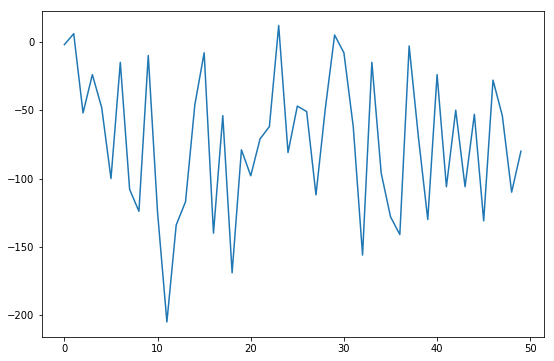

In [16]:
plt.plot(rabi_subtracted[74,74,:])
# plt.plot(data_rabi[74,74,:])
# plt.plot(rabi_bg[74,74,:])
plt.show()

In [4]:
odmr_counter_pulser_MW_Basler_v2_interfuse._WF_data.shape

(150, 148, 76)

In [5]:
ESR_data = odmr_counter_pulser_MW_Basler_v2_interfuse._WF_data

In [7]:
savedict = {'data' : ESR_data}

import numpy as np
import scipy.io



scipy.io.savemat('ESR_data.mat',savedict)

# arr = np.asarray(rabi_2000reps)
# np.savetxt('rabidata_2000r.csv',arr, delimiter = ',')